<a href="https://colab.research.google.com/github/shwetaNayak19/Demand-prediction-for-public-transport/blob/main/Demand_prediction_for_public_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Traffic Jam: Predicting People's Movement into Nairobi**

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

#**Importing required Libraries for analysis.**

In [ ]:
import pandas as pd # for data handling and manipulation
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# magic function to render graphs/charts in notebook
%matplotlib inline  
import plotly.graph_objects as go
import plotly.express as px
#import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

#**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#**Reading Data in Notebook**

In [ ]:
#reading csv file 
Public_transport_df = pd.read_csv('/content/train_revised.csv')

#**Exploring Dataset**

In [ ]:
#checking top 5 rows of dataset
Public_transport_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49


In [ ]:
#checking bottom 5 rows of dataset
Public_transport_df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-2018,08:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-2018,08:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-2018,08:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-2018,07:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-2017,05:10,Kisii,Nairobi,Bus,49


In [ ]:
#Now check information about dataset
Public_transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
Public_transport_df.shape

(51645, 10)

#**Inference**.
1.  Total No of entries- 51645.
2.  Total of columns- 10.



#**Data descrition**



* **ride_id:** unique ID of a vehicle on a specific route on a specific day and time.
*  **seat_number:** seat assigned to ticket
* **payment_method:** method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* **payment_receipt:** unique id number for ticket purchased from Mobiticket
* **travel_date:** date of ride departure. (MM/DD/YYYY)
* **travel_time:** scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* **travel_from:** town from which ride originated
* **travel_to:** destination of ride. All rides are to Nairobi.
* **car_type:** vehicle type (shuttle or bus)
* **max_capacity:** number of seats on the vehicle






In [ ]:
#now check the summary statistics of numerical columns
Public_transport_df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [ ]:
#creating copy of dataset before working with it so that we can have original data untouched
df = Public_transport_df.copy()

In [ ]:
#check the column names 
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ride_id,51645.0,NaN,NaN,NaN,10188.645793,2211.295708,1442.0,8287.0,10353.0,12029.0,20117.0
seat_number,51645,61,1,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,51645,2,Mpesa,51532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_receipt,51645,51645,UZUEHCBUSO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_date,51645,149,10-12-2017,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_time,51645,78,07:09,3926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_from,51645,17,Kisii,22607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_to,51645,1,Nairobi,51645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_type,51645,2,Bus,31985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_capacity,51645.0,NaN,NaN,NaN,34.534321,18.451193,11.0,11.0,49.0,49.0,49.0


#**Summary**

* There are total 61 unique seats in this dataset
* Travelers have used 2 types of payment method and 
* Most of the people have used Mpesa to pay for their ticket.
* The record of 149 days out of 2 year is present in this dataset.
* There are 2 different types of car and most of them are bus.

#**Check columns and their unique values**

In [ ]:
#check unique values for categorical columnns
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()[:8]}\n')

Unique values in categorical columns seat_number are: ['15A' '14A' '8B' '19A' '11A' '18B' '25' '21B']

Unique values in categorical columns payment_method are: ['Mpesa' 'Cash']

Unique values in categorical columns payment_receipt are: ['UZUEHCBUSO' 'TIHLBUSGTE' 'EQX8Q5G19O' 'SGP18CL0ME' 'BM97HFRGL9'
 'B6PBDU30IZ' 'MZHGDGS6QZ' 'MYVTYFNXDZ']

Unique values in categorical columns travel_date are: ['17-10-2017' '19-11-2017' '26-11-2017' '27-11-2017' '20-04-2018'
 '19-04-2018' '18-04-2018' '17-04-2018']

Unique values in categorical columns travel_time are: ['07:15' '07:12' '07:05' '07:10' '07:09' '05:10' '09:50' '07:06']

Unique values in categorical columns travel_from are: ['Migori' 'Keroka' 'Homa Bay' 'Kisii' 'Keumbu' 'Rongo' 'Kijauri' 'Oyugis']

Unique values in categorical columns travel_to are: ['Nairobi']

Unique values in categorical columns car_type are: ['Bus' 'shuttle']



In [ ]:
#check unique values for numerical columns
numerical_columns = df._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns ride_id are: [1442 5437 5710 5777 5778 5781 5784 5789]

Unique values in numerical columns max_capacity are: [49 11]



In [ ]:
#check count of unqiue ride_id
len(df['ride_id'].unique())

6249

#**Handling missing values**.

In [ ]:
Public_transport_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

* As we can see from above dataset, **no null** values are present in the dataset


#**Summary**

*  There are total 61 unique seats in this dataset
*  Travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.
*  The record of 149 days out of 2 year is present in  this dataset.
* There are 2 different types of car and most of them are bus.




#**Finding Target variable**.
* Since we are not given the target variable so we need to find target variable.

 For finding Target variable, I am find the count of **ride_id** and that will be the **number_of_tickets** as our target variable.


In [ ]:
labels = Public_transport_df .groupby(['ride_id']).seat_number.count().rename('number_of_tickets').reset_index()
labels

,ride_id,number_of_tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


#**Add target variable into main dataframe**.

In [ ]:
#merge two datasets on 'ride_id' columns
df= pd.merge(df, labels, how ='left', on = 'ride_id')

In [ ]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-2018,08:00,Awendo,Nairobi,Bus,49,1
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-2018,08:00,Migori,Nairobi,Bus,49,29
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-2018,08:00,Migori,Nairobi,Bus,49,29
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-2018,07:08,Awendo,Nairobi,Bus,49,27


In [ ]:
#check for duplicate rows
df.duplicated().value_counts()

False    51645
dtype: int64

*  we can see there is no duplicate row in our dataset.

#**Converting some columns to proper dtype and format.**

In [ ]:
#concatenate travel date and travel time column and make a new feature called date.
df["date"]=df["travel_date"]+ " "+df["travel_time"]


In [ ]:
df["date"]=pd.to_datetime(df["date"])
df["hour"]=df["date"].dt.hour
df["minute"]=df["date"].dt.minute

In [ ]:
#as travel_date is in object dtype so we will convert it into datetime
df['travel_date'] = pd.to_datetime(Public_transport_df['travel_date'],format = '%d-%m-%Y')

In [ ]:
#first convert travel_time from object to datetime
df['travelling_time'] = pd.to_datetime(df['travel_time'])

In [ ]:
#now convert travel_time to time format
df['travelling_time'] = df['travelling_time'].dt.time

In [ ]:
#splitting travel_date column into day,month and year

def split_date(df):
  '''This function takes dataframe as an argument and extract the different date features of the date variable and return updated dataset'''
  df['day_of_month'] = df['travel_date'].dt.day
  df['month'] = df['travel_date'].dt.month
  df['year'] = df['travel_date'].dt.year
  df['day_of_week'] = df['travel_date'].dt.dayofweek
  df['is_weekend'] = df['day_of_week'].apply(lambda x : 1 if x in[5,6] else 0)
  return df

In [ ]:
df = split_date(df)

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,date,hour,minute,travelling_time,day_of_month,month,year,day_of_week,is_weekend
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,07:15,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,7,15,07:15:00,17,10,2017,1,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,07:12,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,7,12,07:12:00,19,11,2017,6,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,07:05,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,7,5,07:05:00,26,11,2017,6,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,07:10,Homa Bay,Nairobi,Bus,49,5,2017-11-27 07:10:00,7,10,07:10:00,27,11,2017,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,07:12,Migori,Nairobi,Bus,49,31,2017-11-27 07:12:00,7,12,07:12:00,27,11,2017,0,0


In [ ]:
df['month'].value_counts()

12    12768
2     12315
3     10876
1      7830
4      6924
11      931
10        1
Name: month, dtype: int64

#**Exploratory Data Analysis(EDA)**

In [ ]:
#checking from which place people travel most
df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

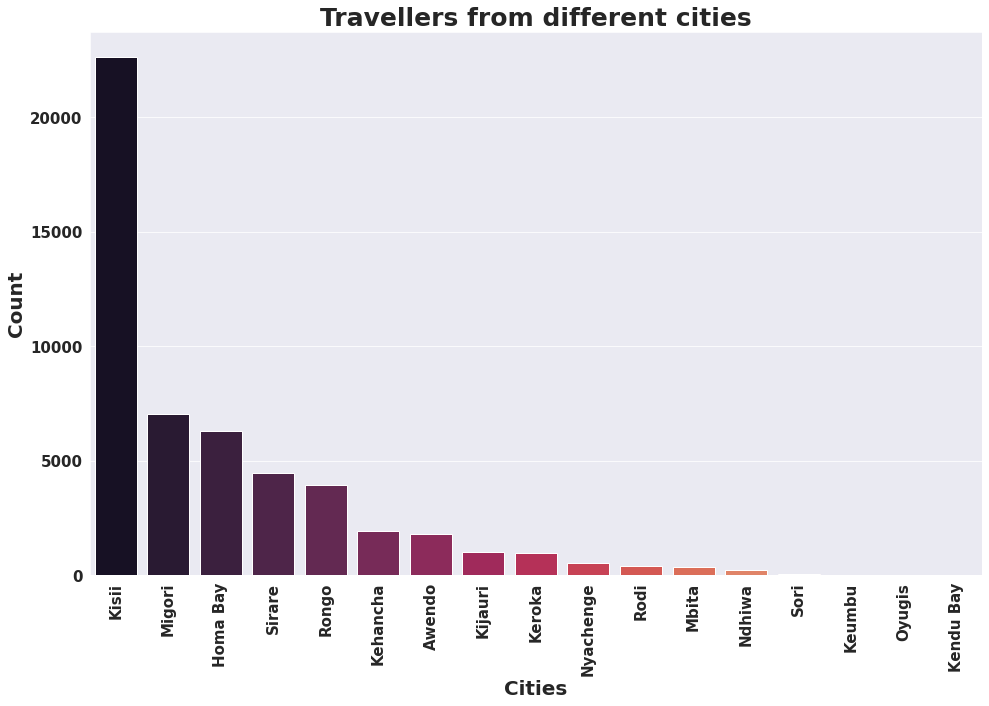

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(x=df['travel_from'],palette='rocket',order=df['travel_from'].value_counts().index)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Travellers from different cities');

#**Inference**
* Most of travellers are from kissi city followed by Migori and Homa Bay.

In [ ]:
#Car type and payment methods
cols = ['car_type','payment_method']
print(df[cols].value_counts())

car_type  payment_method
Bus       Mpesa             31941
shuttle   Mpesa             19591
          Cash                 69
Bus       Cash                 44
dtype: int64


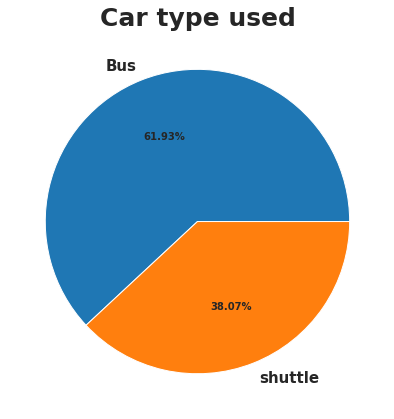

In [ ]:

plt.figure(figsize=(7,7))
plt.pie(df['car_type'].value_counts(),labels = Public_transport_df['car_type'].value_counts().keys(),autopct = '%0.2f%%')
plt.title('Car type used');

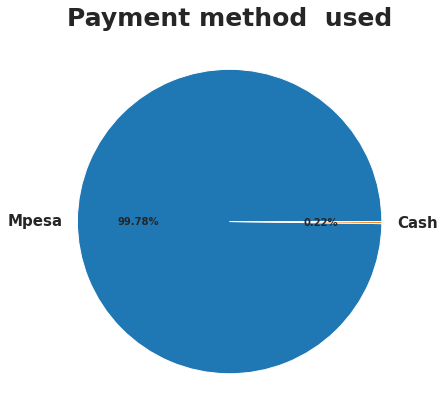

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df['payment_method'].value_counts(),labels = Public_transport_df['payment_method'].value_counts().keys(),autopct = '%0.2f%%')
plt.title('Payment method  used');

#**Inference**
* Travellers mostly preferred  Bus: 61.93%.
* Mostly Mpesa payment method is used for payment 99.78% 

In [ ]:
df['month'].value_counts()

12    12768
2     12315
3     10876
1      7830
4      6924
11      931
10        1
Name: month, dtype: int64

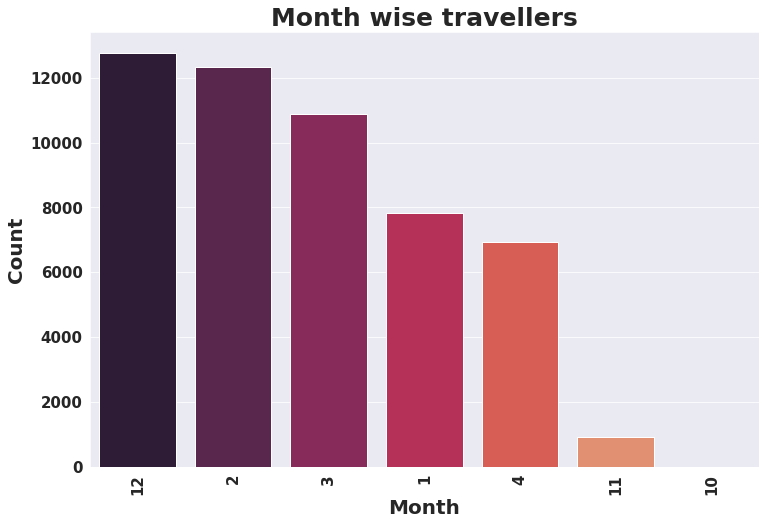

In [ ]:
#cheking for Month wise travels
plt.figure(figsize=(12,8))
sns.countplot(x=df['month'],palette='rocket',order=df['month'].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Month wise travellers');

#**Inferences**
* People prefer to travel in summer season mostly in December to April.

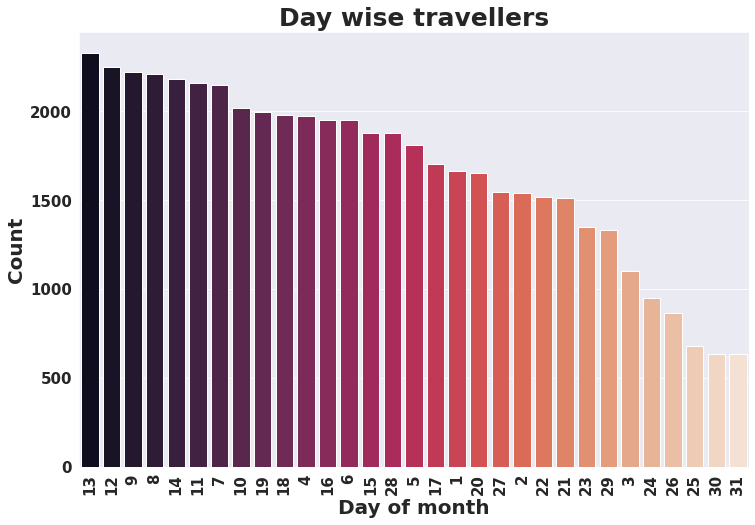

In [ ]:
#cheking for Day wise travels
plt.figure(figsize=(12,8))
sns.countplot(x=df['day_of_month'],palette='rocket',order=df['day_of_month'].value_counts().index)
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Day wise travellers');

#**Inference**

* There is no such huge difference in day wise travel still people most travels in start and middle of month.

In [ ]:
df['year'].value_counts()

2018    37945
2017    13700
Name: year, dtype: int64

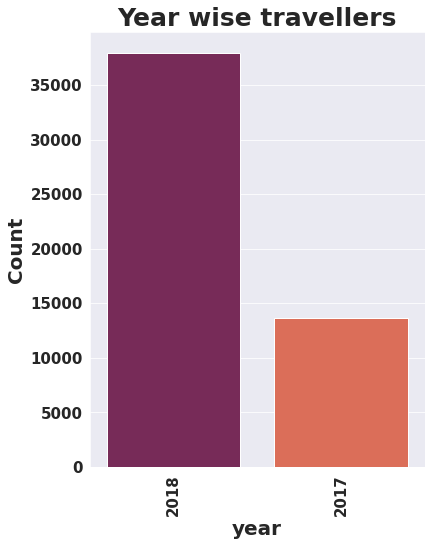

In [ ]:
#Checking which year has the highest travellers
plt.figure(figsize=(6,8))
sns.countplot(x=df['year'],palette='rocket',order=df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Year wise travellers');

#**Inference**
* Year 2018 has the highest number of traveller almost triple than year 2017.

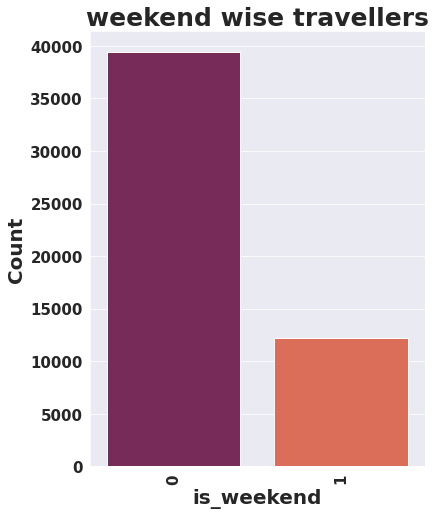

In [ ]:
#Checking weekend travellers
plt.figure(figsize=(6,8))
sns.countplot(x=df['is_weekend'],palette='rocket',order=df['is_weekend'].value_counts().index)
plt.xlabel('is_weekend')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('weekend wise travellers');